In [121]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
walmart_df = pd.read_csv(r"D:/Projects/Walmart_Analysis/Walmart.csv")

In [3]:
walmart_df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [4]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [5]:
# Checking for duplicate records
walmart_df.duplicated().sum()

51

In [6]:
# Removing the duplicate records
walmart_df.drop_duplicates(inplace=True)

In [7]:
# Checking for missing values
walmart_df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [8]:
# Treating missing values
walmart_df.dropna(inplace=True)

In [9]:
walmart_df.shape

(9969, 11)

In [10]:
walmart_df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [11]:
# Unit price should be converted to float datatype
walmart_df['unit_price'] = walmart_df['unit_price'].str.replace('$','').astype('float')

In [12]:
# Need to calculate the total price 
walmart_df['Total_price'] = walmart_df['unit_price'] * walmart_df['quantity']

In [13]:
walmart_df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
Total_price       float64
dtype: object

In [14]:
walmart_df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [ ]:
walmart_df.describe()

,invoice_id,unit_price,quantity,rating,profit_margin,Total_price
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000


Overview of Walmart Sales Data Insights:

Unit Price: The product unit prices span from $10 to $100, offering a broad spectrum of affordable to mid-range items across different categories.

Quantity per Sale: On average, each transaction involves the purchase of 1 to 10 units, reflecting varied consumer buying behavior and potential opportunities for bulk purchases.

Total Transaction Value: The total price per transaction ranges from $10 to approximately $1000, with an average value of $121, indicating that while most sales are modest, there are significant transactions that could represent high-value products or larger orders.

Product Ratings: The average product rating sits at around 6, suggesting room for improvement in customer satisfaction or potential opportunities for addressing product feedback.

Profit Margins: The average profit margin across all sales is 0.40, providing a healthy margin that can be leveraged for strategic pricing, cost control, or promotions to enhance profitability.

In [17]:
# Exporting this cleaned data as csv file
walmart_df.to_csv('Walmart_cleaned_data.csv',index=False)

### Exporting the cleaned data to the database 

In [25]:
import pymysql
from sqlalchemy import create_engine

In [ ]:
username = "_Username_"
password = "_password_"
host = "_host_name_"  
database = "_database_name_"

In [27]:
connection_str= f"mysql+pymysql://{username}:{password}@{host}/{database}"
engine = create_engine(connection_str)

try:
    print("Connection success")
except:
    print("Connection unsuccessful")

Connection success


In [28]:
walmart_df.to_sql(name='walmart_sales',con=engine,if_exists='append',index=False)

9969

In [33]:
query = "SELECT * FROM walmart_sales"
result = pd.read_sql(query, con=engine)
pd.DataFrame(result)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
9964,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.00
9965,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.00
9966,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.00
9967,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.00


In [ ]:
# Top 5 cities with highest sales
query = '''SELECT City, SUM(Total_price) Total_Sales
            FROM walmart_sales
            GROUP BY City
            ORDER BY Total_Sales DESC
            LIMIT 5'''
result = pd.read_sql(query, con=engine)
hig_txn = pd.DataFrame(result)
hig_txn

,City,Total_Sales
0,Weslaco,46351.79
1,Waxahachie,40703.33
2,Plano,25688.34
3,San Antonio,24950.56
4,Port Arthur,24524.37


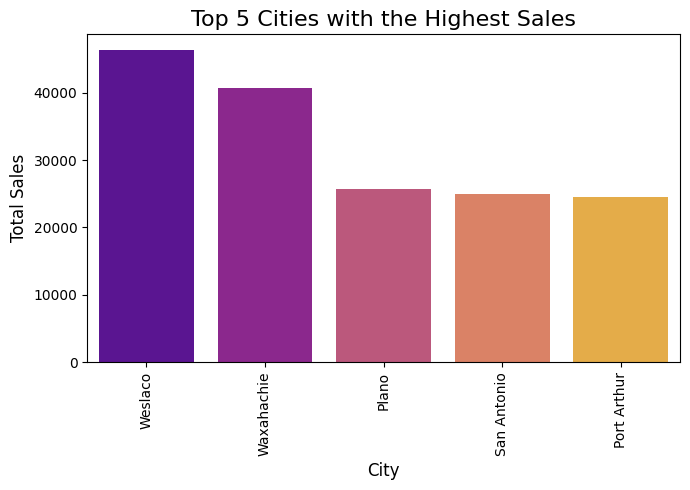

In [126]:
plt.figure(figsize=(7, 5))
sns.barplot(x="City", y="Total_Sales", data=hig_txn, palette="plasma")
plt.title("Top 5 Cities with the Highest Sales", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [128]:
# Top 5 cities with lowest Sales
query = '''SELECT City, SUM(Total_price) Total_Sales
            FROM walmart_sales
            GROUP BY City
            ORDER BY Total_Sales
            LIMIT 5'''
result = pd.read_sql(query, con=engine)
low_txn = pd.DataFrame(result)
low_txn

,City,Total_Sales
0,Lake Jackson,5038.90
1,Lewisville,5568.84
2,Irving,6237.11
3,Pearland,6572.91
4,Longview,6769.33


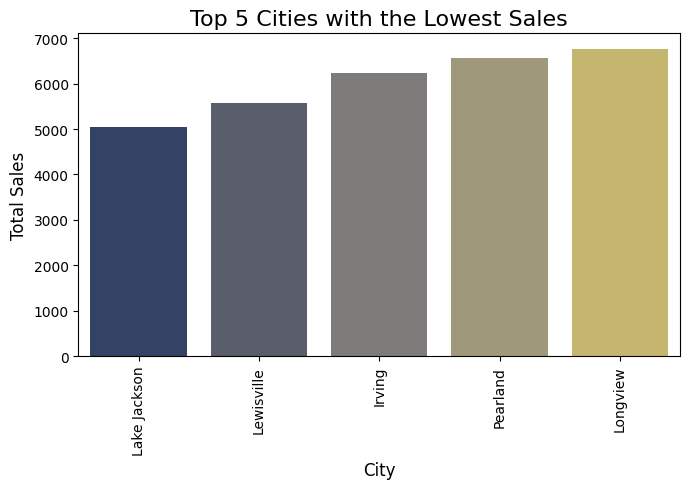

In [129]:
plt.figure(figsize=(7, 5))
sns.barplot(x="City", y="Total_Sales", data=low_txn, palette="cividis")
plt.title("Top 5 Cities with the Lowest Sales", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Among the 98 cities analyzed, Weslaco emerged as the top-performing region, contributing 4% of total sales, showcasing robust consumer engagement and strong market activity. In contrast, Lake Jackson recorded the lowest sales share at 0.5%, highlighting an area with lower market activity that could benefit from focused strategies to unlock growth potential

In [131]:
# Which category has the highest and lowest sales
query = '''SELECT category,SUM(Total_price) Total_Sales
            FROM walmart_sales
            GROUP BY category
            ORDER BY Total_Sales DESC'''
result = pd.read_sql(query, con=engine)
tot_pur= pd.DataFrame(result)
tot_pur

,category,Total_Sales
0,Fashion accessories,489480.90
1,Home and lifestyle,489250.06
2,Electronic accessories,78175.03
3,Food and beverages,53471.28
4,Sports and travel,52497.93
5,Health and beauty,46851.18


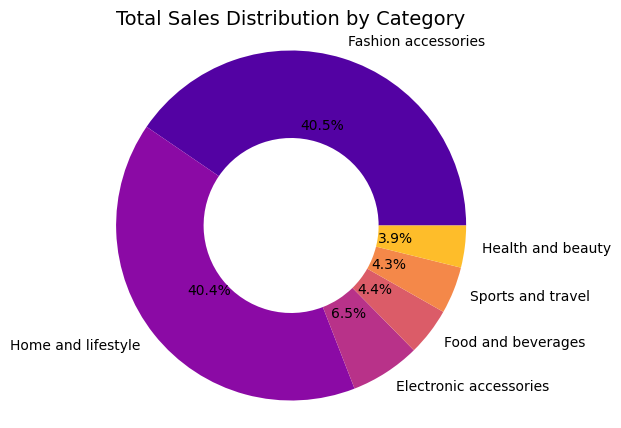

In [132]:
colors = sns.color_palette("plasma", len(tot_pur))
plt.figure(figsize=(7, 5))
plt.pie(
    tot_pur['Total_Sales'],
    labels=tot_pur['category'],
    autopct='%1.1f%%', 
    colors=colors,
    wedgeprops={'width': 0.5} 
)

plt.title("Total Sales Distribution by Category", fontsize=14)
plt.axis('equal') 
plt.show()

The Fashion Accessories and Home & Lifestyle categories account for nearly 80% of total sales, indicating significant customer demand and strong market performance in these segments. On the other hand, the Health & Beauty category contributes only 4% of total sales, signaling limited customer engagement or untapped potential that could be unlocked through focused strategies to drive growth

In [134]:
# Which payment method customer uses the most and which contributes for higher sales.
query = '''SELECT payment_method,COUNT(*) Total_transactions,SUM(Total_price) Total_Sales
            FROM walmart_sales
            GROUP BY payment_method
            ORDER BY Total_Sales DESC'''
result = pd.read_sql(query, con=engine)
pay_meth= pd.DataFrame(result)
pay_meth

,payment_method,Total_transactions,Total_Sales
0,Credit card,4256,488821.02
1,Ewallet,3881,457316.07
2,Cash,1832,263589.29


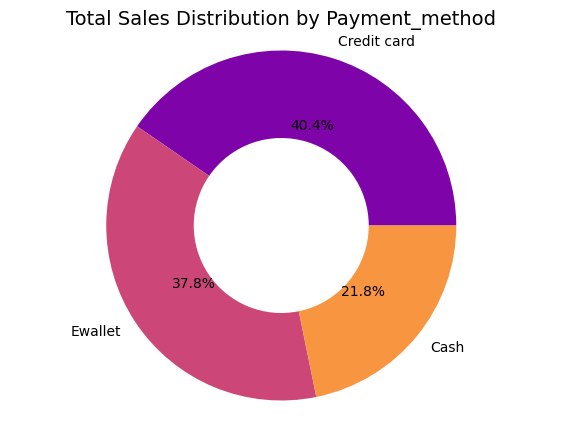

In [137]:
colors = sns.color_palette("plasma", len(pay_meth))
plt.figure(figsize=(7, 5))
plt.pie(
    pay_meth['Total_Sales'],
    labels=pay_meth['payment_method'],
    autopct='%1.1f%%', 
    colors=colors,
    wedgeprops={'width': 0.5} 
)

plt.title("Total Sales Distribution by Payment_method", fontsize=14)
plt.axis('equal') 
plt.show()

The majority of sales are completed using credit cards, accounting for 40% of total sales, indicating a strong customer preference for this payment method. In contrast, cash transactions contribute only 21%, making it the least preferred option. This trend underscores the growing reliance on digital payment methods, particularly credit cards, which offer advantages such as convenience, faster transactions, and reward benefits, driving their popularity among customers.

In [148]:
# Which day has the highest and lowest sales
query = '''SELECT 
            DAYNAME(date) day,
            SUM(Total_price) Total_Sales,
            (AVG(profit_margin)*100) Average_profit_margin
            FROM walmart_sales
            GROUP BY day
            ORDER BY Total_Sales DESC'''
result = pd.read_sql(query, con=engine)
day= pd.DataFrame(result)
day

,day,Total_Sales,Average_profit_margin
0,Thursday,179250.03,39.160604
1,Sunday,177879.58,39.269732
2,Friday,176055.57,39.470304
3,Wednesday,173740.82,39.271579
4,Tuesday,170244.92,39.511364
5,Saturday,167349.37,39.776671
6,Monday,165206.09,39.164474


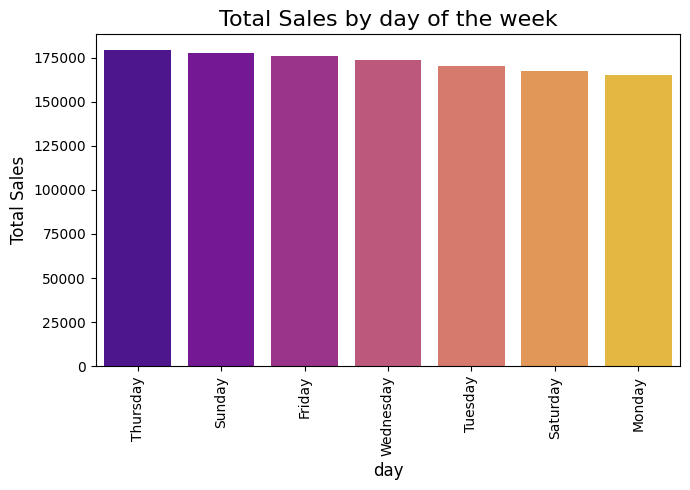

In [145]:
plt.figure(figsize=(7, 5))
sns.barplot(x="day", y="Total_Sales", data=day, palette="plasma")
plt.title("Total Sales by day of the week", fontsize=16)
plt.xlabel("day", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Sales across the week have remained relatively consistent, with a slight peak observed on Thursday, contributing to 15% of the total weekly sales. In contrast, Monday recorded the lowest sales at approximately 13%, highlighting minor fluctuations in customer purchasing behavior across the days of the week.


In [173]:
# Which time of the day has the highest and lowest sales and their average profit percentage
query = '''SELECT 
            HOUR(time) AS hour,
            SUM(Total_price) Total_Sales
            FROM walmart_sales
            GROUP BY hour
            ORDER BY hour'''
result = pd.read_sql(query, con=engine)
hrs= pd.DataFrame(result)
hrs

,hour,Total_Sales
0,6,30839.00
1,7,35325.00
2,8,29591.00
3,9,34295.00
4,10,60756.22
5,11,60700.79
6,12,57820.65
7,13,66288.74
8,14,61472.38
9,15,142016.77


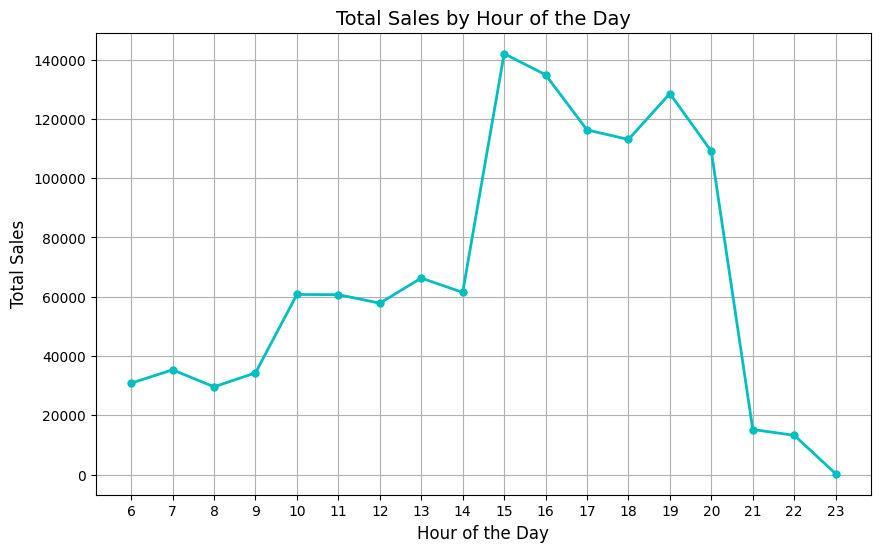

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(hrs['hour'], hrs['Total_Sales'], marker='o', color='c', linestyle='-', linewidth=2, markersize=5)

plt.title('Total Sales by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.grid(True)
plt.xticks(hrs['hour']) 
plt.show()

Between 3:00 PM to 4:00 PM, we observe the highest sales, indicating a peak period of customer activity. In contrast, 11:00 PM sees the lowest sales, likely due to the close of business operations and reduced customer engagement during late hours.

In [164]:
# Top 10 branches with highest total sales and their average rating.
query = '''SELECT 
            Branch,
            City,
            SUM(Total_price) Total_Sales,
            AVG(rating) Average_rating
            FROM walmart_sales
            GROUP BY Branch,City
            ORDER BY Total_Sales DESC
            LIMIT 10'''
result = pd.read_sql(query, con=engine)
branch= pd.DataFrame(result)
branch

,Branch,City,Total_Sales,Average_rating
0,WALM009,Plano,25688.34,5.338298
1,WALM074,Weslaco,25555.42,5.176190
2,WALM003,San Antonio,24950.56,5.370430
3,WALM058,Port Arthur,24524.37,5.298745
4,WALM030,Richardson,24460.60,5.403057
5,WALM069,Rockwall,24077.70,5.356757
6,WALM029,Round Rock,23327.34,5.238265
7,WALM084,Schertz,23095.43,5.319512
8,WALM075,San Marcos,22124.51,5.076064
9,WALM089,Southlake,21267.06,5.308791


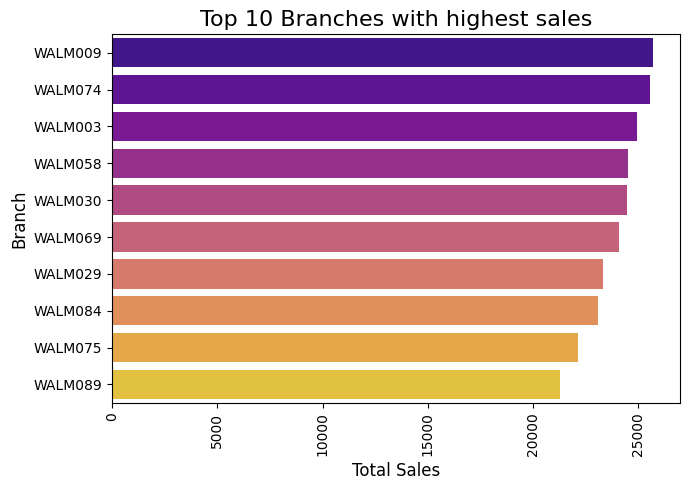

In [171]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Total_Sales", y="Branch", data=branch, palette="plasma")
plt.title("Top 10 Branches with highest sales", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Branch", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

The WALM009 branch in Plano city stands out with the highest sales, generating $25,688 in revenue, accounting for 2% of total global sales from Walmart stores. Following this, the WALM074 and WALM003 branches rank second and third, respectively, in terms of revenue.

However, it is noteworthy that despite being among the top 10 branches with the highest revenue, the customer ratings for these branches are relatively low, averaging around 5. This discrepancy highlights a potential area for improvement in customer satisfaction, which could be addressed to further enhance sales performance

In [ ]:
# Top 10 branches with lowest total sales and their average rating.
query = '''SELECT 
            Branch,
            City,
            SUM(Total_price) Total_Sales,
            AVG(rating) Average_rating
            FROM walmart_sales
            GROUP BY Branch,City
            ORDER BY Total_Sales 
            LIMIT 10'''
result = pd.read_sql(query, con=engine)
branch= pd.DataFrame(result)
branch

,Branch,City,Total_Sales,Average_rating
0,WALM092,Lake Jackson,5038.90,6.527451
1,WALM031,Lewisville,5568.84,6.244643
2,WALM013,Irving,6237.11,6.291228
3,WALM033,Pearland,6572.91,6.249123
4,WALM039,Longview,6769.33,6.450847
5,WALM014,Amarillo,6777.46,6.542308
6,WALM077,Coppell,6926.94,6.569231
7,WALM018,Frisco,7233.95,6.559375
8,WALM041,Mission,7327.06,6.237313
9,WALM097,Alice,7376.91,6.164179


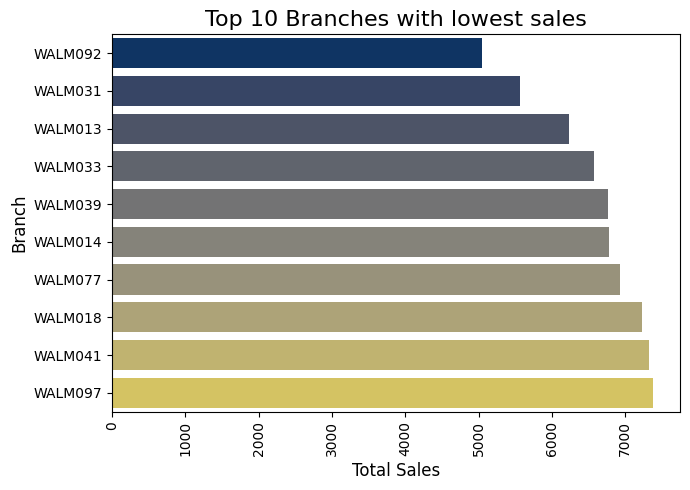

In [176]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Total_Sales", y="Branch", data=branch, palette="cividis")
plt.title("Top 10 Branches with lowest sales", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Branch", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

The WALM092 branch in Lake Jackson city has the lowest total revenue, generating only $5,038 in sales, followed by the WALM031 and WALM013 branches, respectively.

Interestingly, despite having the lowest sales, these branches show relatively higher customer ratings compared to the top revenue-generating branches. This observation highlights an underlying pattern in the analysis of branch performance, where some lower-revenue branches may have higher customer satisfaction scores, potentially indicating that customer experience is not always directly correlated with sales volume

Recommendations :

1. Focus on Underperforming Cities: 
Lake Jackson recorded the lowest sales share (0.5%). This indicates potential for growth in this region.

Action: Implement localized marketing strategies, promotions, and loyalty programs to increase brand awareness and customer engagement in Lake Jackson. Consider targeted campaigns that resonate with the local customer base, potentially leveraging the higher customer ratings to attract more sales.

2. Strengthen the Health & Beauty Category:
Health & Beauty accounts for only 4% of total sales, signaling untapped potential.

Action: Revamp the product offerings in this category, focusing on in-demand products or emerging trends. Introduce targeted marketing campaigns, collaborate with influencers, or run seasonal promotions to increase customer engagement.

3. Leverage Credit Card Preference:
Credit card payments dominate, accounting for 40% of total sales, reflecting a strong customer preference for digital payment methods.

Action: Enhance customer convenience by promoting digital payment options and loyalty rewards for credit card users. Consider partnerships with credit card providers to offer exclusive deals or promotions for credit card users, further boosting digital payment adoption.

4. Capitalize on Thursday Peak Sales:
Thursday shows the highest sales (15% of total weekly sales).

Action: Maximize Thursday's peak by offering special promotions, flash sales, or time-limited discounts to drive even higher sales. You can create “Thursday Deals” to encourage customers to shop on this day.

5. Target High-Activity Window (3-4 PM):
The period between 3:00 PM to 4:00 PM sees the highest sales activity.

Action: Use this time window to push time-sensitive promotions, flash sales, or exclusive discounts to maximize sales. Coordinate marketing efforts such as social media posts and email campaigns to align with this peak hour.

6. Improve Customer Satisfaction in High-Revenue Branches:
Top-performing branches like WALM009 in Plano show high revenue but relatively low customer ratings (around 5).

Action: Focus on improving customer service, addressing pain points, and enhancing the overall shopping experience in high-revenue branches. Train staff on customer satisfaction best practices and ensure product availability and quality.

7. Align Customer Experience with Sales Performance:
There is a noticeable pattern where some lower-revenue branches have higher customer satisfaction.

Action: Investigate how customer experience drives satisfaction in lower-revenue branches and replicate these best practices in higher-revenue branches. Consider implementing customer-first strategies like personalized recommendations, better in-store experiences, or more responsive customer service.